In [8]:
import os
current_directory = os.getcwd()
files = os.listdir(current_directory)
for file in files:
    if file.endswith(".csv"):
        print(os.path.join(current_directory, file))

/home/7efff54b-1643-4002-9180-b207283c99c2/Project folders/loan.csv
/home/7efff54b-1643-4002-9180-b207283c99c2/Project folders/day.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Bike Sharing System - bss
bss = pd.read_csv("/home/7efff54b-1643-4002-9180-b207283c99c2/Project folders/day.csv", parse_dates = True)
bss.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Step 1 - Data Analysis and Cleaning

In [13]:
# Total, Casual and registered are target variables
# Season, year, month, holiday, week/working day, weather and temp are predictive variables
bss.shape

(730, 16)

In [15]:
bss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [17]:
bss.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [14]:
# checking for the null values in column data

bss.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
# Copying the dataframe into new

new_bss = bss.copy()

In [45]:
bss.season.info

<bound method Series.info of 0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: object>

In [24]:
new_bss.value_counts()


instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
730      31-12-2019  1       1   12    0        1        1           2           8.849153   11.17435  57.7500  10.374682  439     2290        2729    1
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
2        02-01-2018  1       0   1     0        0        0           2           14.902598  17.68695  69.6087  16.652113  131     670         801     1
3        03-01-2018  1       0   1     0        1        1           1           8.050924   9.47025   43.7273  16.636703  120     1229        1349    1
4        04-01-2018  1       0   1     0        2        1           1           8.200000   10.60610  59.0435  10.739832  108     1454        1562    1
                                                                                             

In [27]:
# dropping the duplicates

new_bss.drop_duplicates(inplace=True)

In [30]:
# re-verifying the shape of new dataframe

new_bss.shape

(730, 16)

In [33]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bss.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [38]:
# Encoding/mapping the season column

bss.season = bss.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [41]:
# Encoding/mapping the month column

bss.mnth = bss.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [44]:
# Encoding/mapping the weekday column

bss.weekday = bss.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [47]:
# Encoding/mapping the weathersit column

bss.weathersit = bss.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [50]:
bss.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0      Misty  14.110847   
1  spring   0  jan        0     sun           0      Misty  14.902598   
2  spring   0  jan        0     mon           1      Clear   8.050924   
3  spring   0  jan        0     tue           1      Clear   8.200000   
4  spring   0  jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [53]:
# check the column info of the dataset

bss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2 - Data Visualization

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from numpy import arange

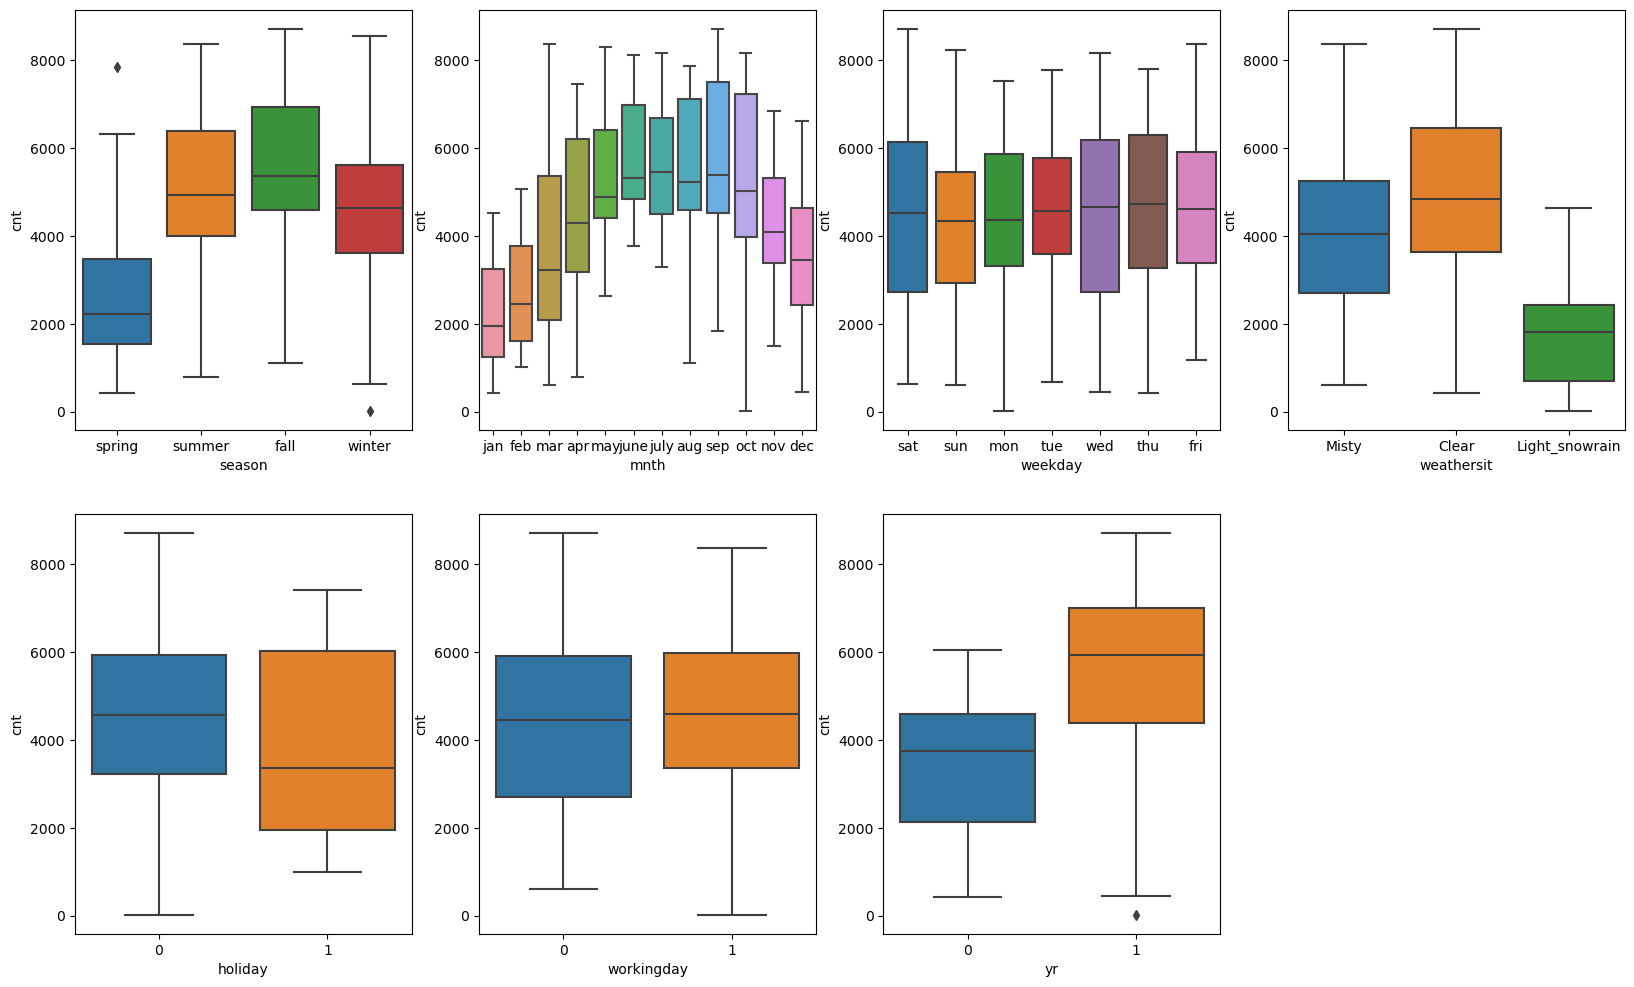

In [64]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bss )
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bss)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bss)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bss)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bss)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bss)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bss)
plt.show()

In [134]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data = bss)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data = bss, hue = 'yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

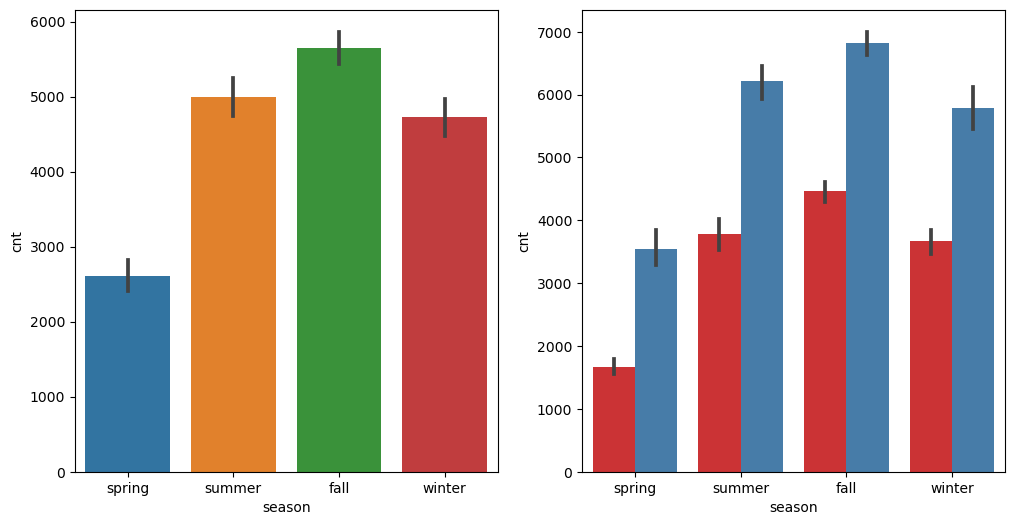

In [139]:
# plotting visualization for season column
bss['season'] = bss['season'].astype(str)
plot_cat_columns('season')

#### Fall season has more bookings. The booking count is increased from 2018 to 2019.

In [94]:
bss.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0      Misty  14.110847   
1  spring   0  jan        0     sun           0      Misty  14.902598   
2  spring   0  jan        0     mon           1      Clear   8.050924   
3  spring   0  jan        0     tue           1      Clear   8.200000   
4  spring   0  jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

AttributeError: 'numpy.int64' object has no attribute 'startswith'

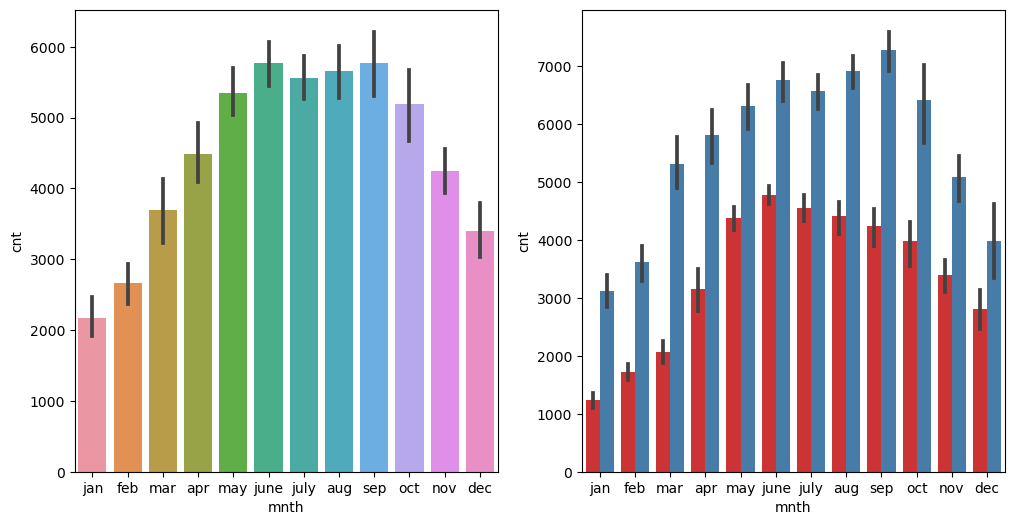

In [137]:
# plotting visualization for month column to determine fall season

plot_cat_columns('mnth')

#### Hike in bookings can be seen during the period of May to Oct .Trend increased starting of the year till mid of the year and then it is declining towards the end of the year. Number of booking for each month has increased from 2018 to 2019.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

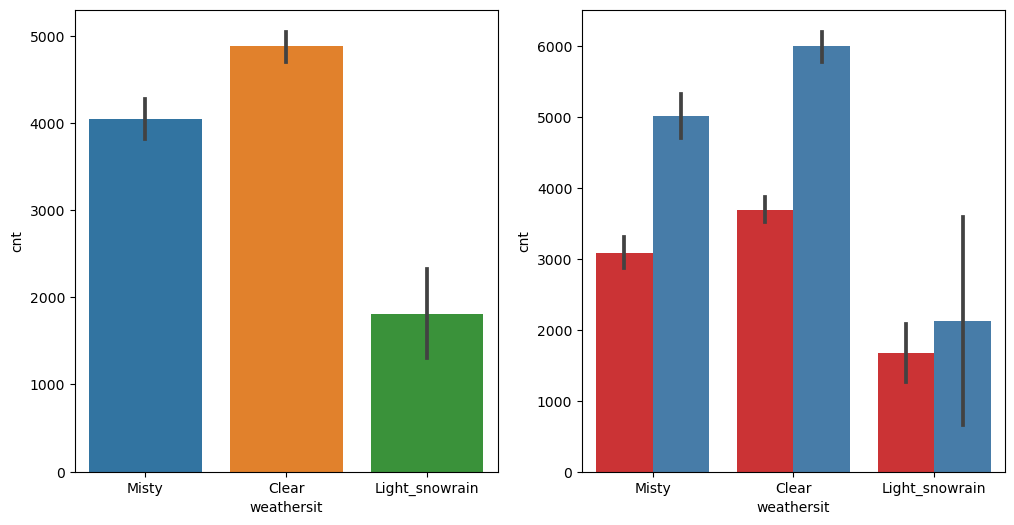

In [149]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

#### The clear weather conditions led to an increase in bookings, which is quite evident. Furthermore, when compared to the previous year, 2018, bookings for each weather condition rose in 2019.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

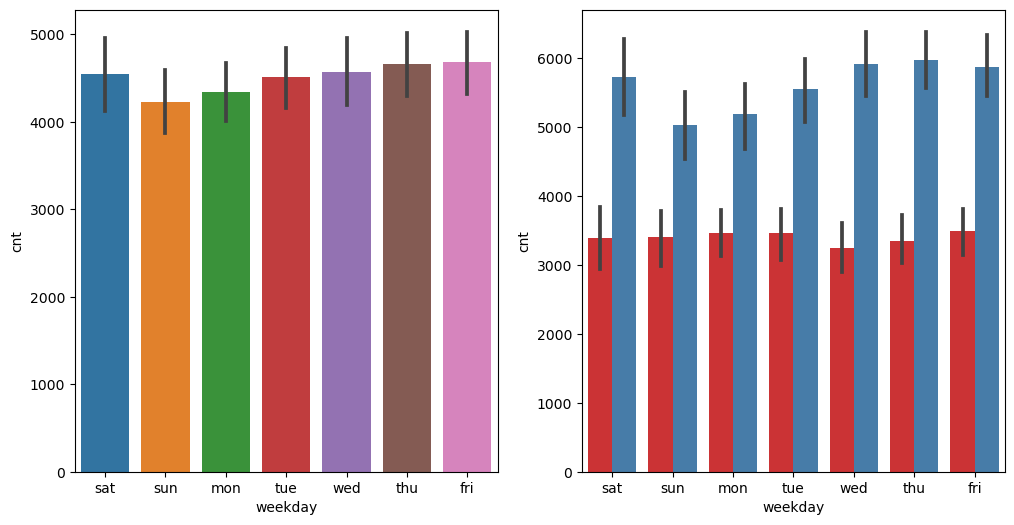

In [154]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

#### Thursday to Sunday has more bookings

AttributeError: 'numpy.int64' object has no attribute 'startswith'

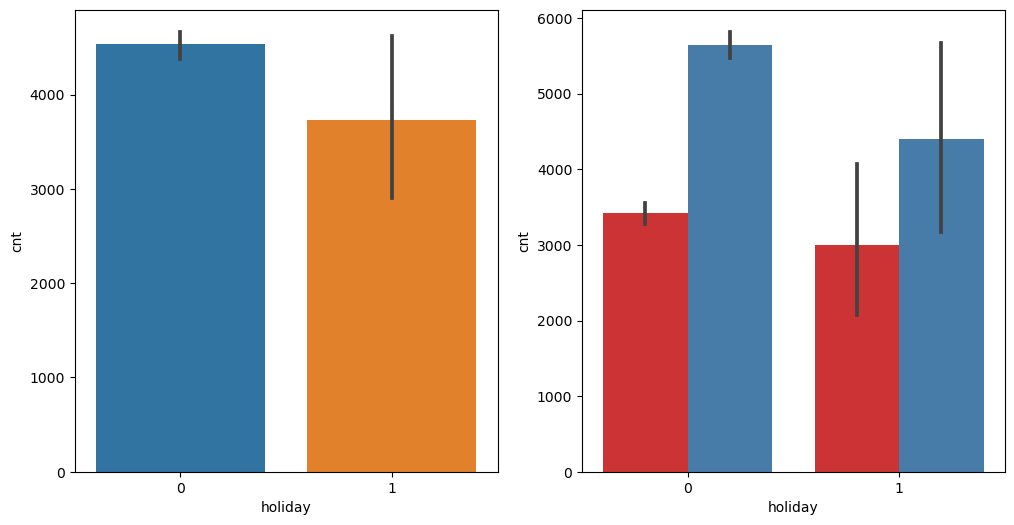

In [171]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

#### The number of bookings appeared to be nearly the same on both working and non-working days. However, there was an increase in the count from 2018 to 2019.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

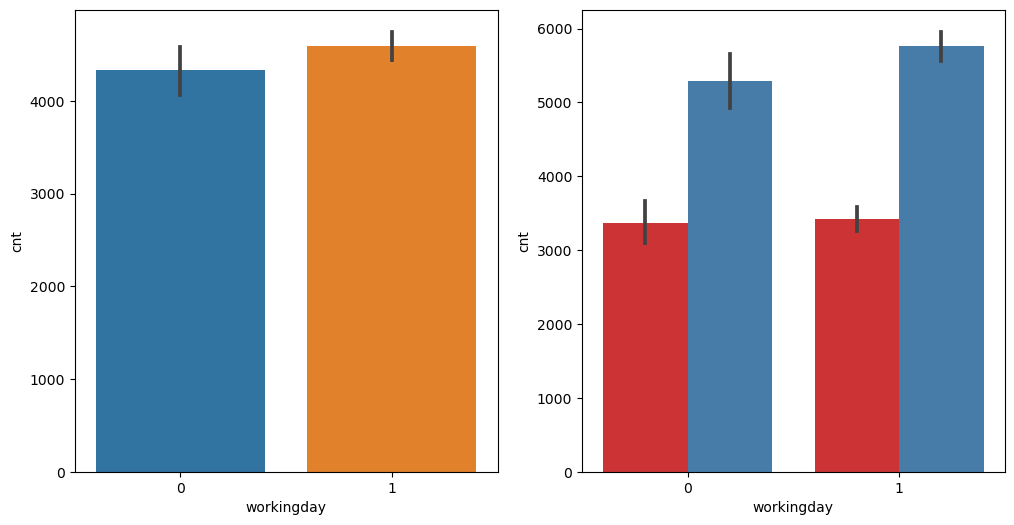

In [177]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

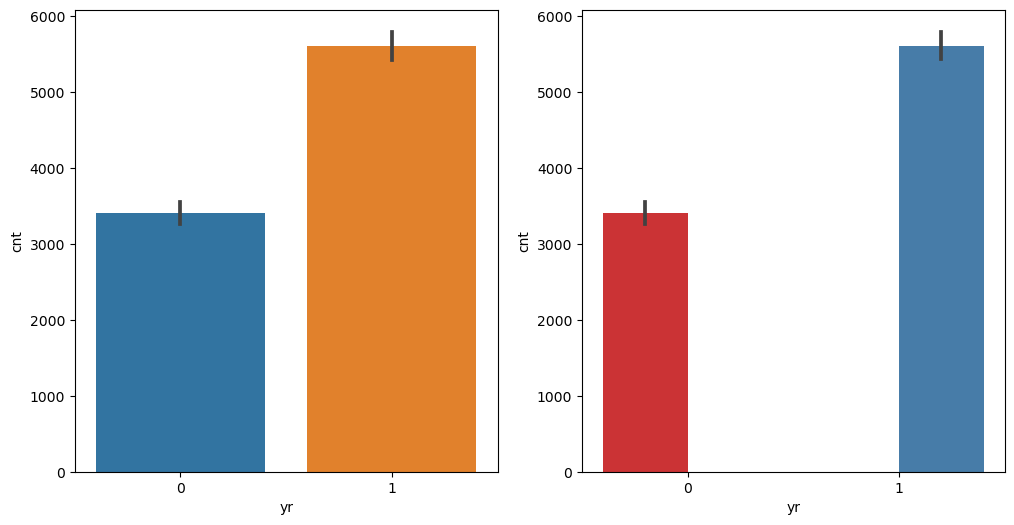

In [180]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

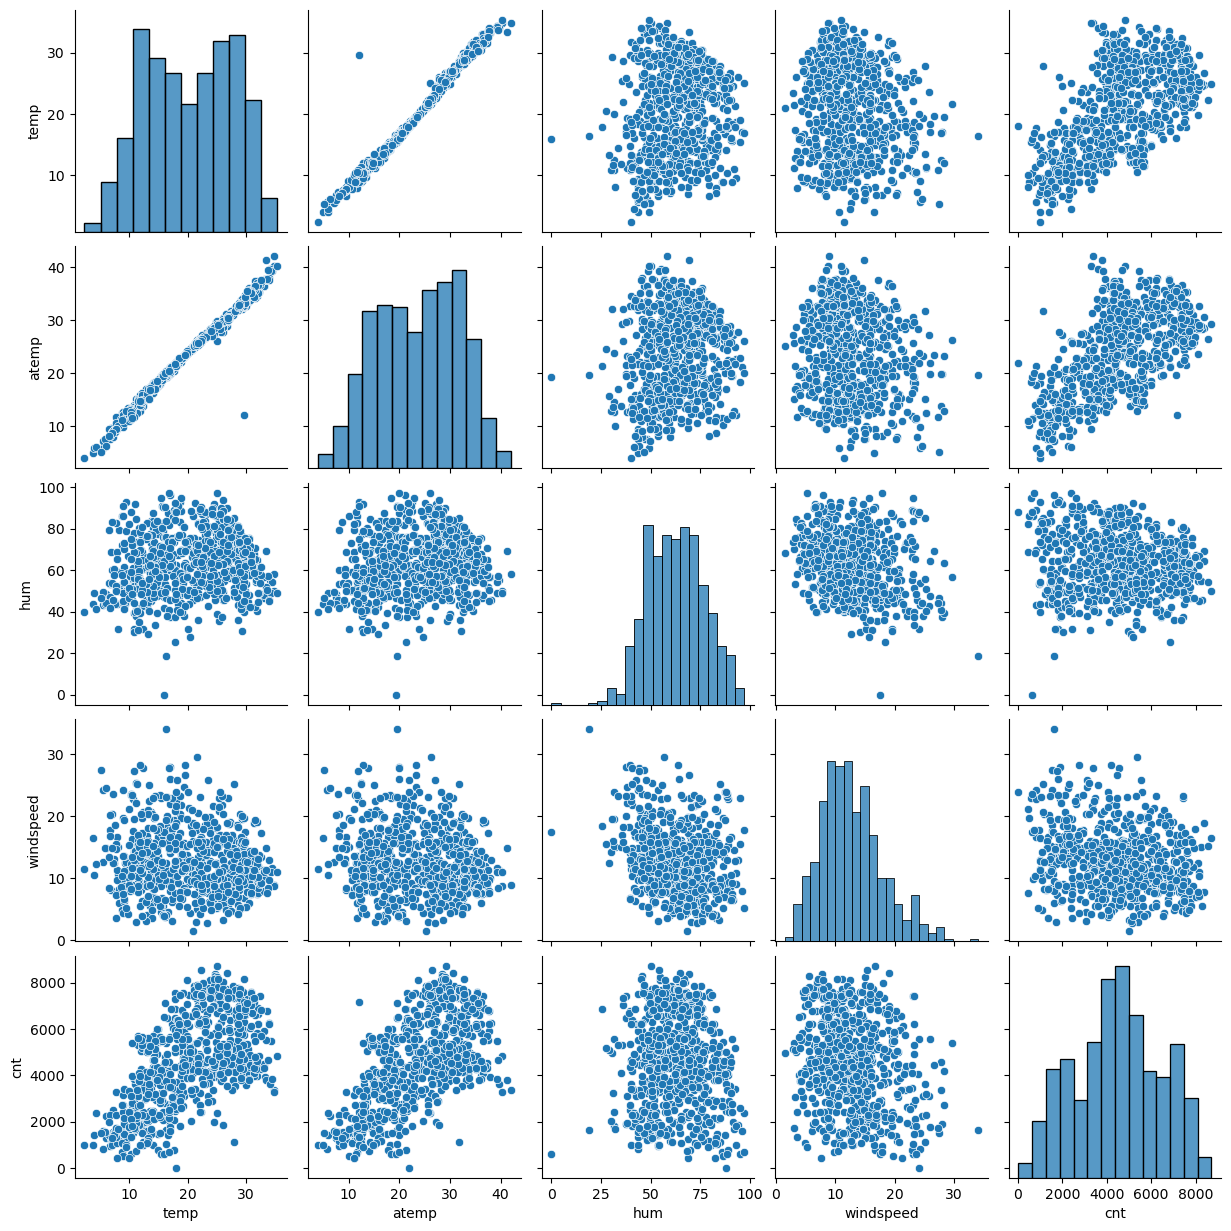

In [184]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bss,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

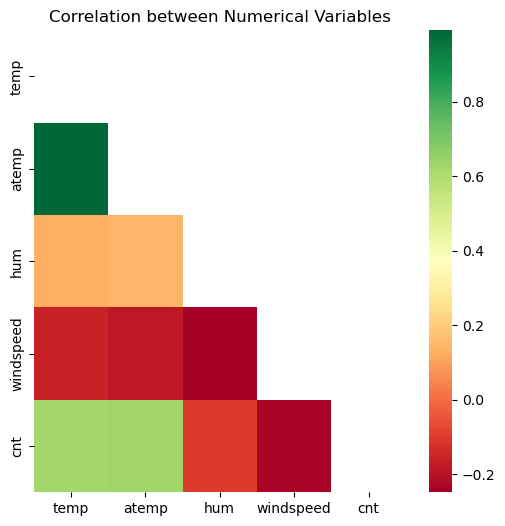

In [192]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bss[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bss[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

### Step 3 - Data Preparation

In [358]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bss.mnth,drop_first=True,dtype='uint8')
weekdays_df=pd.get_dummies(bss.weekday,drop_first=True,dtype='uint8')
weathersit_df=pd.get_dummies(bss.weathersit,drop_first=True,dtype='uint8')
seasons_df=pd.get_dummies(bss.season,drop_first=True,dtype='uint8')

In [360]:
bss.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0      Misty  14.110847   
1  spring   0  jan        0     sun           0      Misty  14.902598   
2  spring   0  jan        0     mon           1      Clear   8.050924   
3  spring   0  jan        0     tue           1      Clear   8.200000   
4  spring   0  jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [362]:
# Merging  the dataframe, with the dummy variable dataset. 

bss_new = pd.concat([bss,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [364]:
bss_new.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0      Misty  14.110847   
1  spring   0  jan        0     sun           0      Misty  14.902598   
2  spring   0  jan        0     mon           1      Clear   8.050924   
3  spring   0  jan        0     tue           1      Clear   8.200000   
4  spring   0  jan        0     wed           1      Clear   9.305237   

      atemp      hum  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125  80.5833  ...    1    0    0    0    0               0      1   
1  17.68695  69.6087  ...    0    1    0    0    0               0      1   
2   9.47025  43.7273  ...    0    0    0    0    0               0      0   
3  10.60610  59.0435  ...    0    0    0    1    0               0      0   
4  11.46350  43.6957  ...    0    0    0    0    1               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [366]:
bss_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [368]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bss_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [370]:
# check the head of new dataframe

bss_new.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
0    0    0  ...    1    0    0    0    0               0      1       1   
1    0    0  ...    0    1    0    0    0               0      1       1   
2    0    0  ...    0    0    0    0    0               0      0       1   
3    0    0  ...    0    0    0    1    0               0      0       1   
4    0    0  ...    0    0    0    0    1               0      0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 30 columns]

In [372]:
# check the shape of new dataframe

bss_new.shape

(730, 30)

### Step 4: Splitting the Data into Training and Testing Sets¶

In [374]:
# splitting the dataframe into Train and Test

np.random.seed(0)
bss_train, bss_test = train_test_split(bss_new, train_size = 0.7, random_state = 100)

In [376]:
# check the shape of training datatset

bss_train.shape

(510, 30)

In [378]:
# check the shape of testing datatset

bss_test.shape

(220, 30)

In [380]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [382]:
# verifying the head of dataset before scaling.

bss_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
576    0    0  ...    0    0    0    1    0               0      0       0   
426    0    0  ...    1    0    0    0    0               0      1       1   
728    0    1  ...    0    1    0    0    0               0      0       1   
482    0    0  ...    1    0    0    0    0               0      1       0   
111    0    0  ...    0    0    0    0    0               0      1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 30 columns]

In [384]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
bss_train[num_vars] = scaler.fit_transform(bss_train[num_vars])

In [257]:
# verifying the head after appying scaling.

bss_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt    aug    dec  ...    sat    sun    thu    tue    wed  \
576  0.827658  False  False  ...  False  False  False   True  False   
426  0.465255  False  False  ...   True  False  False  False  False   
728  0.204096  False   True  ...  False   True  False  False  False   
482  0.482973  False  False  ...   True  False  False  False  False   
111  0.191095  False  False  ...  False  False  False  False  False   

     Light_snowrain  Misty  spring  summer  winter  
576           False  False   False   False   False  
426           False   True    True   False   False  
728           False  False    True   False   False  
482           False   True   False    True   False  
111           False   True   False    True   False  

[5 rows x 30 columns]

In [386]:
# describing the dataset

bss_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.154902   
std      0.169803    0.224421    0.294988    0.278131  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.143137    0.133333    0.131373    0.158824        0.029412   
std      0.350557    0.340268    0.338139    0.365870        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

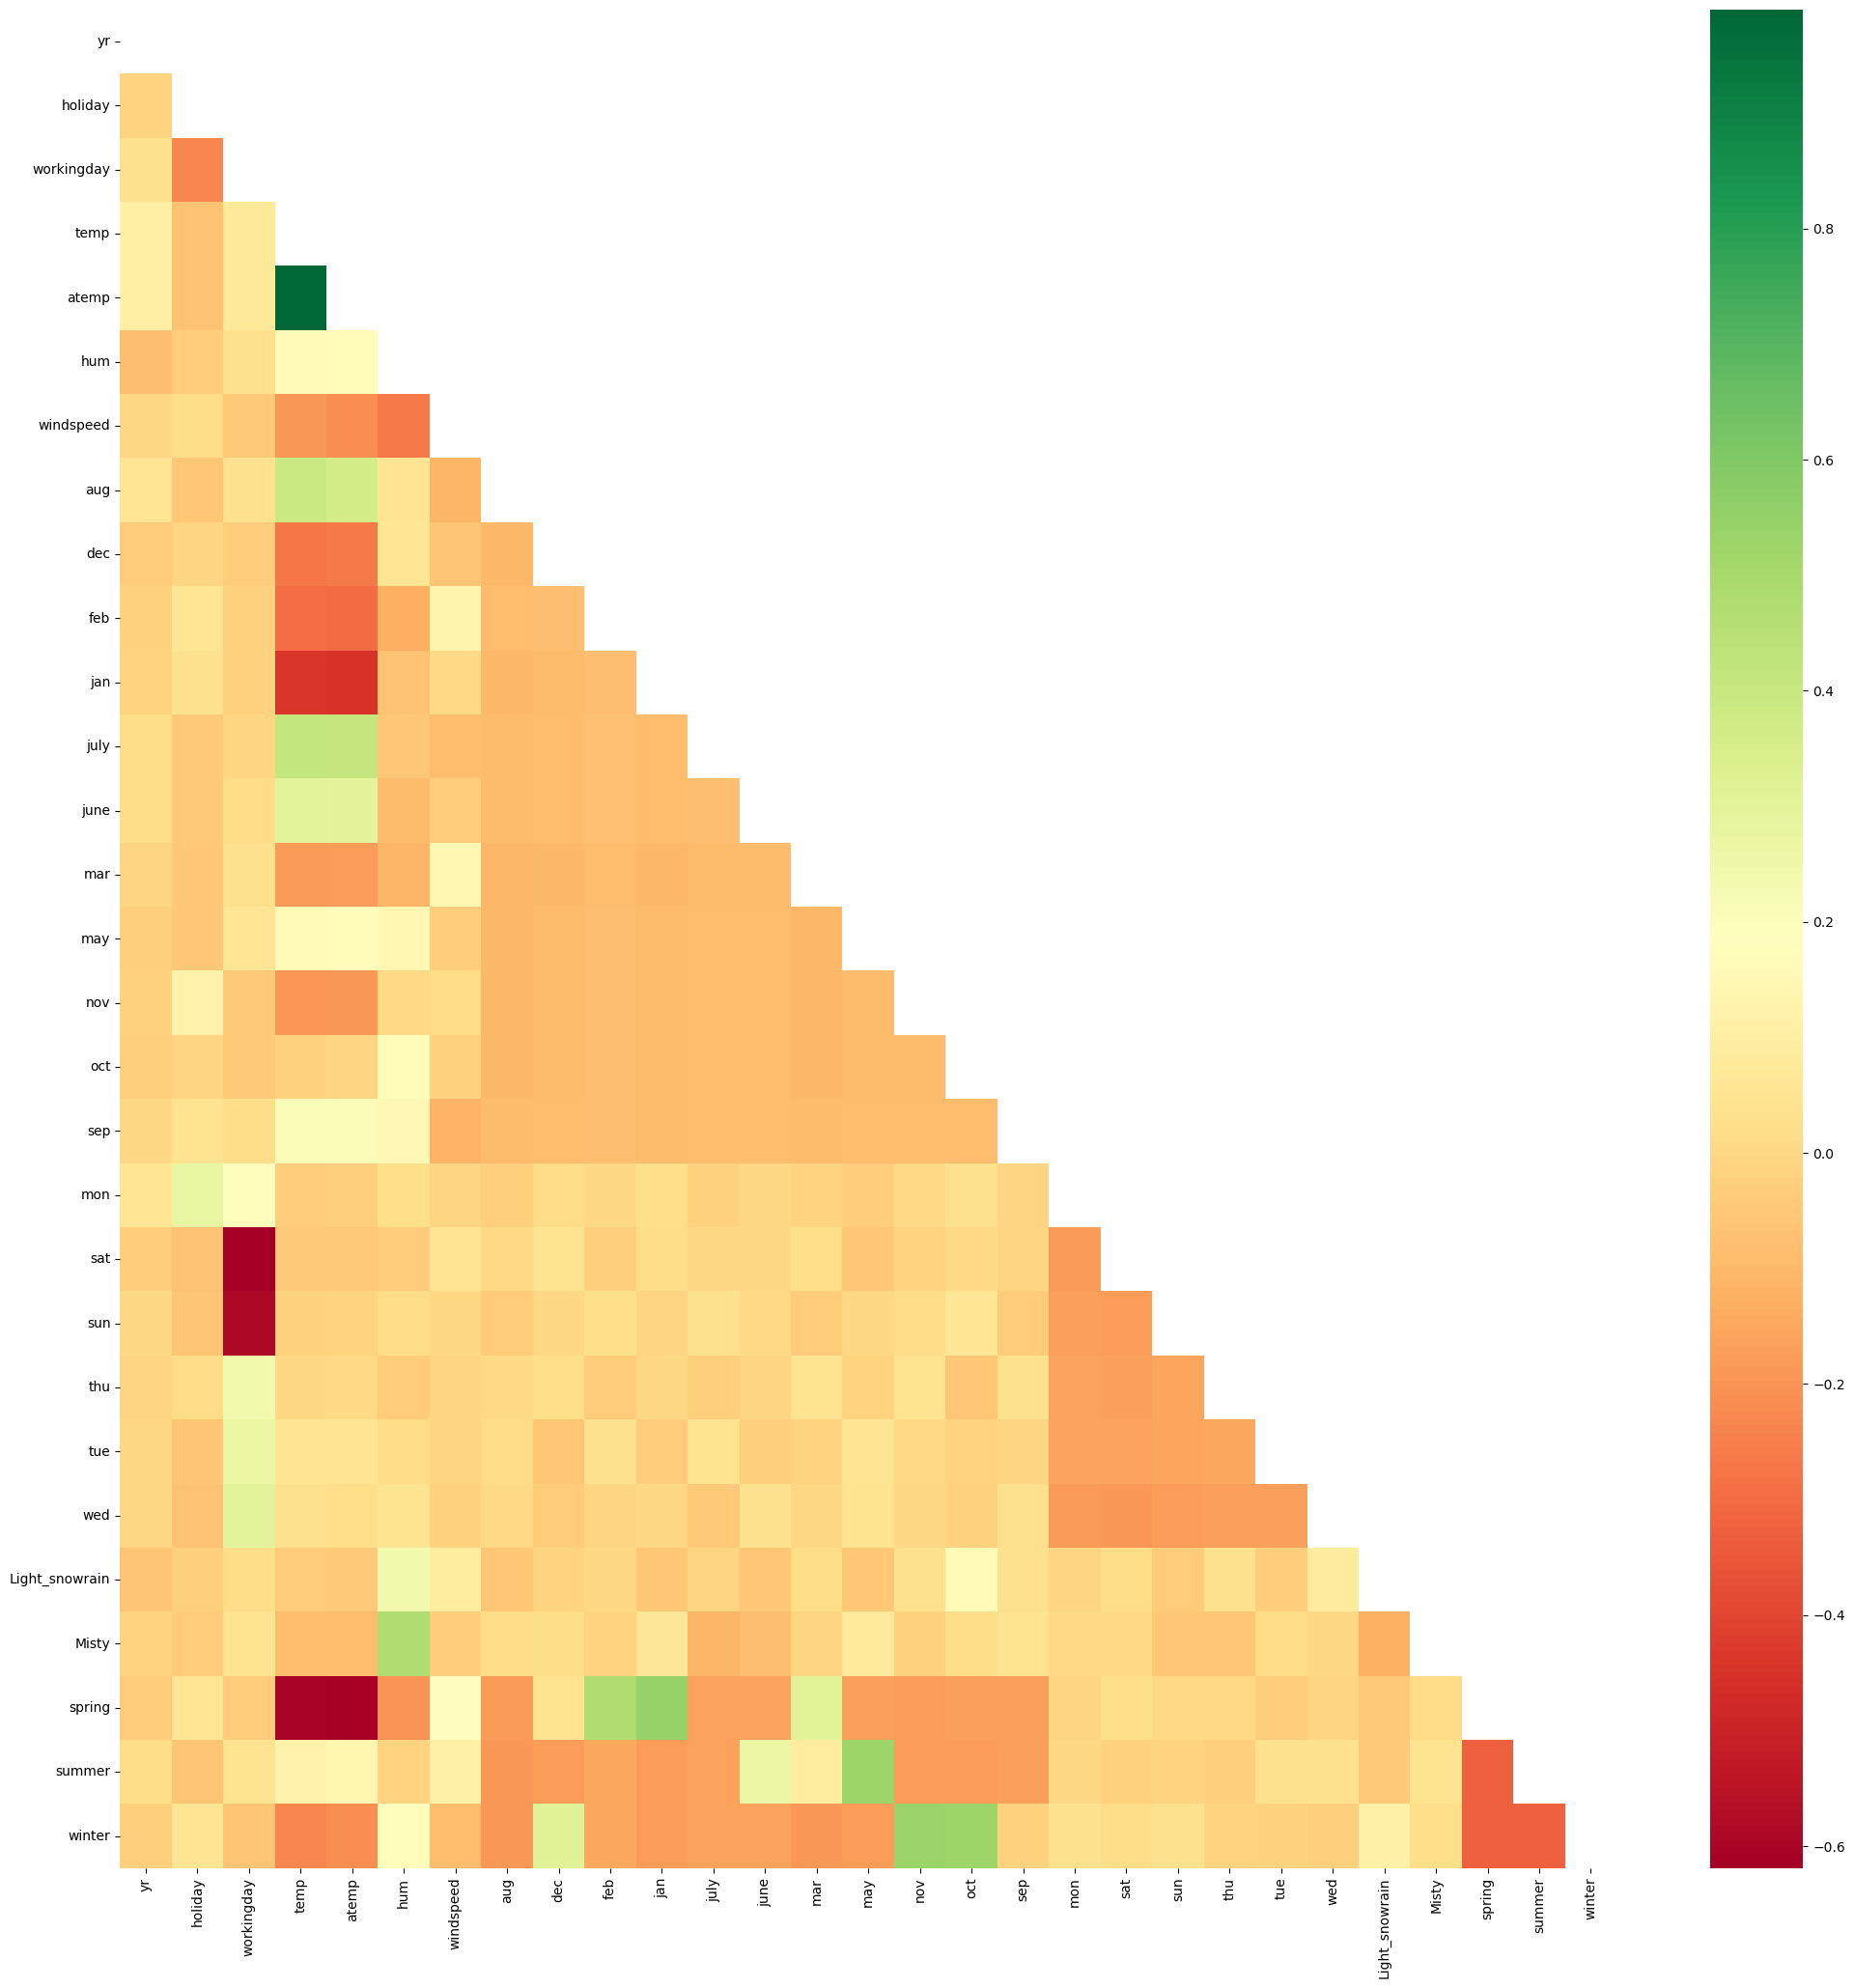

In [407]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bss_train.corr())
sns.heatmap(bss_train.corr(), annot=True, cmap="RdYlGn", mask=matrix)
plt.show()

### The count appears to be correlated with the year variable and temperature. Likewise, misty weather and humidity exhibit correlation. The spring season, with January and February, the summer season, with May, and the winter season, with October and November, demonstrate a strong correlation.

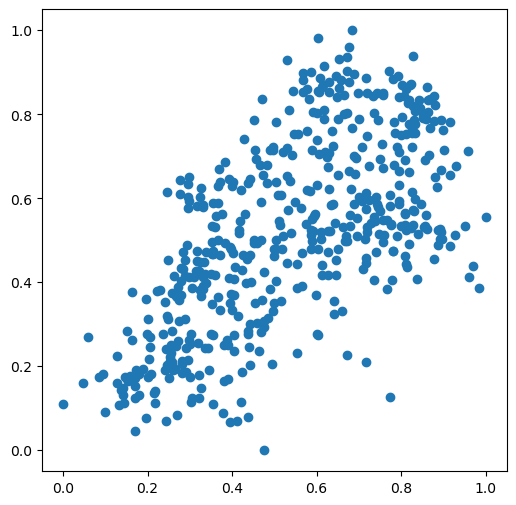

In [390]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bss_train.temp, bss_train.cnt)
plt.show()

### Positive correlation between temp and cnt

In [392]:
# Building the Linear Model

y_train = bss_train.pop('cnt')
X_train = bss_train

In [394]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [284]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', False, 2),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [396]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'spring', 'winter'],
      dtype='object')


In [398]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'oct', 'sep', 'mon',
       'thu', 'tue', 'wed', 'Misty', 'summer'],
      dtype='object')

In [400]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [402]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [404]:
# calculate VIF

calculateVIF(X_train_rfe)

Features    VIF
2       workingday  39.59
9              sat   9.70
10             sun   9.25
3             temp   3.04
12          spring   2.72
1          holiday   2.52
13          winter   2.10
6              jan   1.55
8              nov   1.47
4              hum   1.27
7             july   1.27
5        windspeed   1.17
11  Light_snowrain   1.11
0               yr   1.03

#### Humidity shows high VIF

### Step 5: Building a linear model

In [409]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.54e-182
Time:                        11:26:50   Log-Likelihood:                 493.23
No. Observations:                 510   AIC:                            -958.5
Df Residuals:                     496   BIC:                            -899.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2895      0.026     11.

In [415]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2       workingday  23.84
8              sat   6.24
9              sun   5.84
3             temp   2.96
11          spring   2.72
12          winter   2.05
1          holiday   1.95
5              jan   1.54
7              nov   1.46
6             july   1.24
4        windspeed   1.10
10  Light_snowrain   1.03
0               yr   1.02

In [418]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.28e-170
Time:                        11:37:47   Log-Likelihood:                 461.73
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     497   BIC:                            -842.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1617      0.022      7.

In [424]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2       workingday  23.63
7              sat   6.20
8              sun   5.80
3             temp   2.91
10          spring   2.69
1          holiday   1.91
11          winter   1.74
5              jan   1.54
6             july   1.24
4        windspeed   1.09
9   Light_snowrain   1.03
0               yr   1.02

In [428]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.23e-171
Time:                        11:39:30   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1584      0.021      7.

In [436]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.23e-171
Time:                        11:41:10   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1584      0.021      7.

In [441]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.23e-171
Time:                        11:42:34   Log-Likelihood:                 460.89
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     498   BIC:                            -847.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1584      0.021      7.

In [444]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2       workingday  22.76
6              sat   6.03
7              sun   5.66
9           spring   2.68
3             temp   2.57
1          holiday   1.87
10          winter   1.74
5              jan   1.53
4        windspeed   1.09
8   Light_snowrain   1.03
0               yr   1.02

In [449]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2      workingday  21.45
5             sat   5.71
6             sun   5.39
8          spring   2.50
3            temp   2.43
1         holiday   1.82
9          winter   1.71
4       windspeed   1.07
7  Light_snowrain   1.03
0              yr   1.02

In [460]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.88e-169
Time:                        11:46:29   Log-Likelihood:                 450.17
No. Observations:                 510   AIC:                            -880.3
Df Residuals:                     500   BIC:                            -838.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1582      0.021      7.

#### We can consider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.¶

In [468]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.158227
yr                0.235623
holiday          -0.015003
workingday        0.068215
temp              0.447754
windspeed        -0.138142
sat               0.079198
sun               0.025818
Light_snowrain   -0.257896
spring           -0.111170
winter            0.049335
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [475]:
X_train_lm_6

const  yr  holiday  workingday      temp  windspeed  sat  sun  \
576    1.0   1        0           1  0.815169   0.264686    0    0   
426    1.0   1        0           0  0.442393   0.255342    1    0   
728    1.0   1        0           0  0.245101   0.663106    0    1   
482    1.0   1        0           0  0.395666   0.188475    1    0   
111    1.0   0        0           1  0.345824   0.380981    0    0   
..     ...  ..      ...         ...       ...        ...  ...  ...   
578    1.0   1        0           1  0.863973   0.187140    0    0   
53     1.0   0        0           1  0.202618   0.111379    0    0   
350    1.0   0        0           0  0.248216   0.431816    1    0   
79     1.0   0        0           1  0.462664   0.529881    0    0   
520    1.0   1        0           1  0.600225   0.359599    0    0   

     Light_snowrain  spring  winter  
576               0       0       0  
426               0       1       0  
728               0       1       0  
482               0       0       0  
111               0       0       0  
..              ...     ...     ...  
578               0       0       0  
53                0       1       0  
350               0       0       1  
79                0       0       0  
520               0       0       0  

[510 rows x 11 columns]

In [480]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

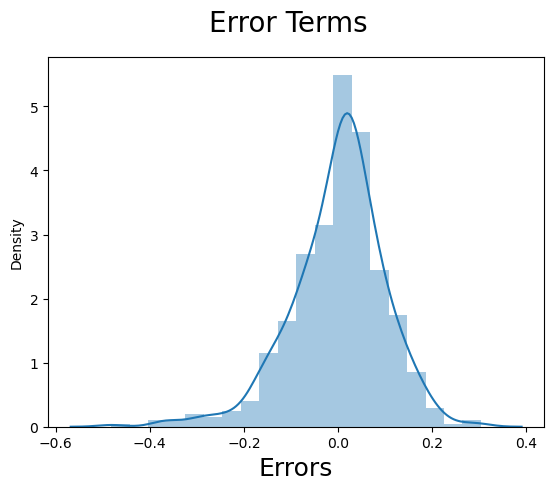

In [483]:
# Plot the histogram of the error terms - to compute Normality

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [490]:
# Multi colinearity
calculateVIF(X_train_new)

Features    VIF
2      workingday  21.45
5             sat   5.71
6             sun   5.39
8          spring   2.50
3            temp   2.43
1         holiday   1.82
9          winter   1.71
4       windspeed   1.07
7  Light_snowrain   1.03
0              yr   1.02

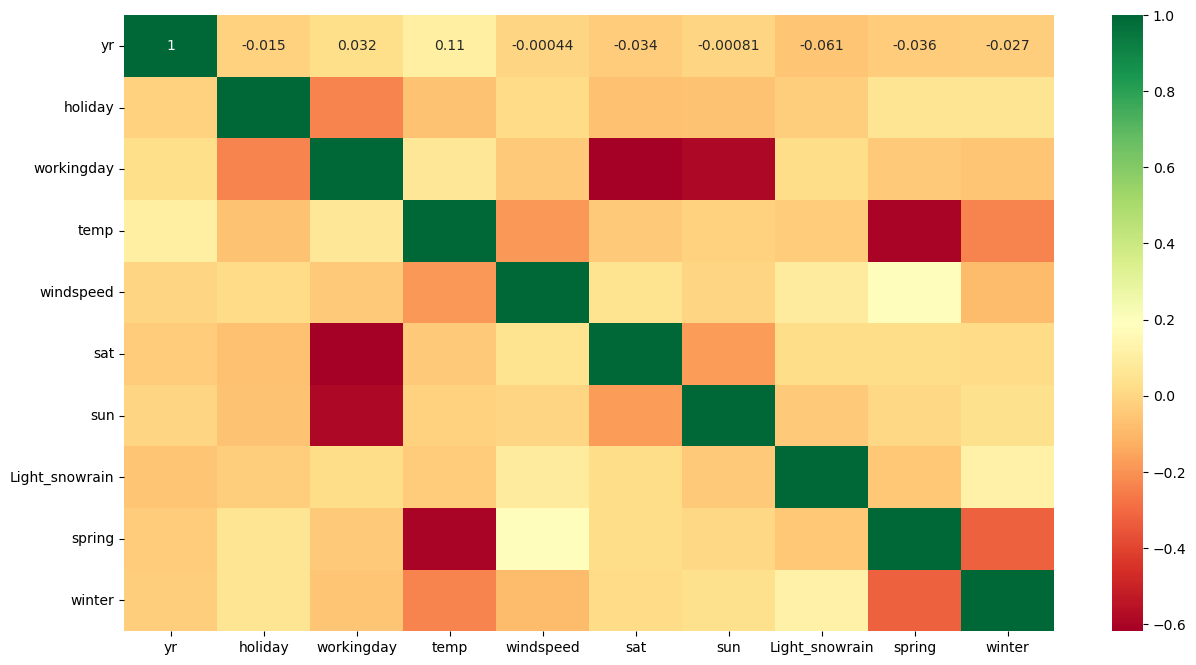

In [496]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### there is no multicolinearity as seen from the heatmap.

### Linearity

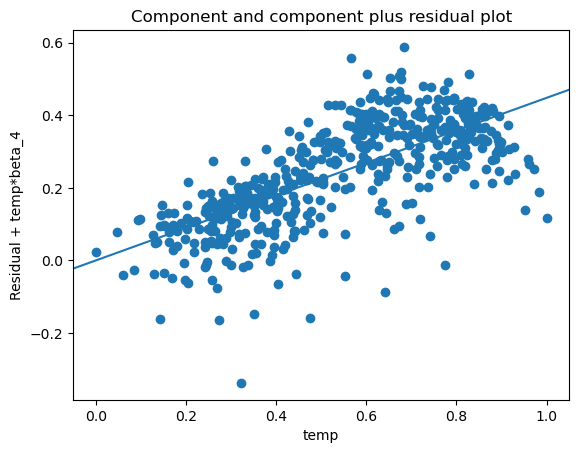

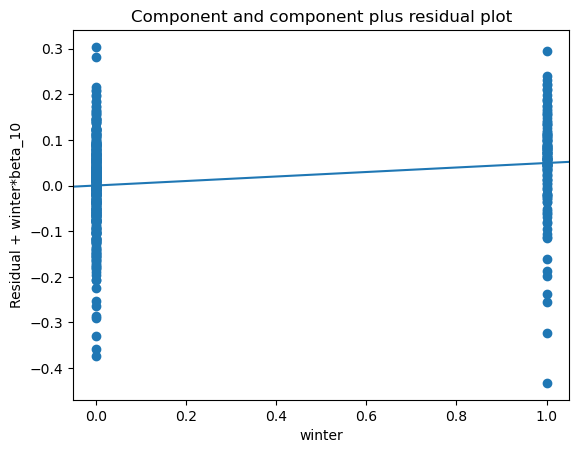

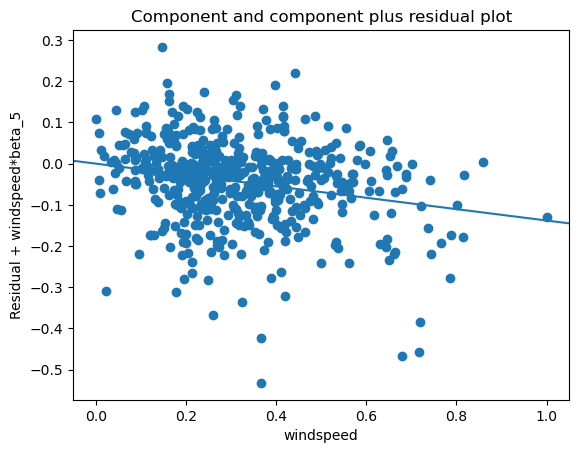

In [509]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'winter')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

### Homoscedasticity¶

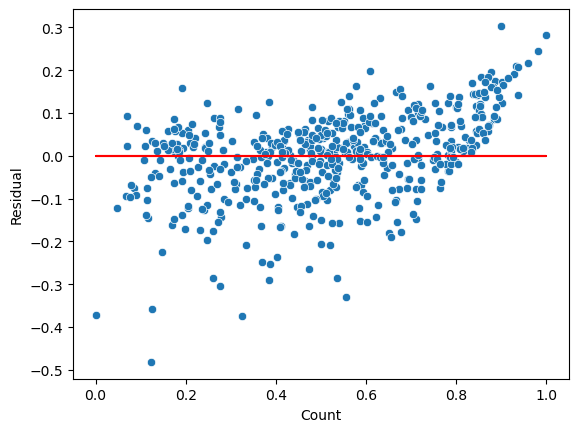

In [522]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Independence of residuals
#### Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

#### Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [543]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bss_test[num_vars] = scaler.transform(bss_test[num_vars])
bss_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.692706    0    0  ...    0    0    0    0    0               0      1   
535  0.712034    0    0  ...    0    0    0    0    1               0      0   
299  0.303382    0    0  ...    0    0    1    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    1               0      0   
152  0.569029    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [547]:
bss_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt         aug         dec  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.059091    0.086364  ...    0.118182   
std      0.159584    0.219163    0.236333    0.281541  ...    0.323559   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  220.000000  220.000000  220.000000  220.000000      220.000000   
mean     0.145455    0.163636    0.168182    0.100000        0.027273   
std      0.353363    0.370789    0.374881    0.300684        0.163248   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [552]:
y_test = bss_test.pop('cnt')
X_test = bss_test

In [555]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [558]:
y_pred = lr_6.predict(X_test_lm_6)

In [561]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7853

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

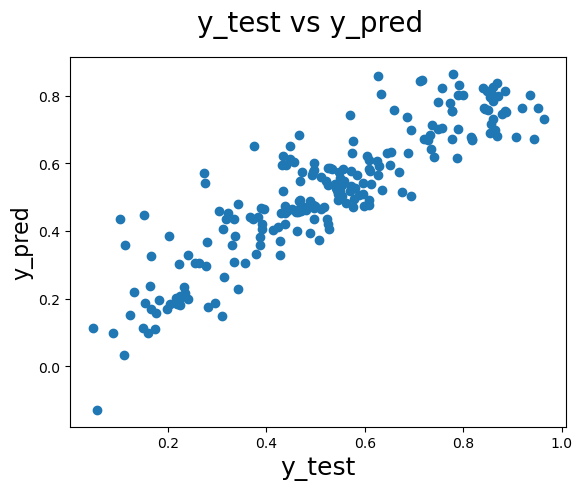

In [566]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [569]:
round(lr_6.params,4) 

const             0.1582
yr                0.2356
holiday          -0.0150
workingday        0.0682
temp              0.4478
windspeed        -0.1381
sat               0.0792
sun               0.0258
Light_snowrain   -0.2579
spring           -0.1112
winter            0.0493
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1582 + 0.2356  \times  year - 0.0150  \times  holiday + 0.0682 \times workingday + 0.4478 \times temp - 0.1381 \times windspeed + 0.0792 \times sat + 0.0258 \times sun - 0.2579 \times Light_snowrain - 0.1112 \times spring + 0.0493 \times winter $

In [577]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7751


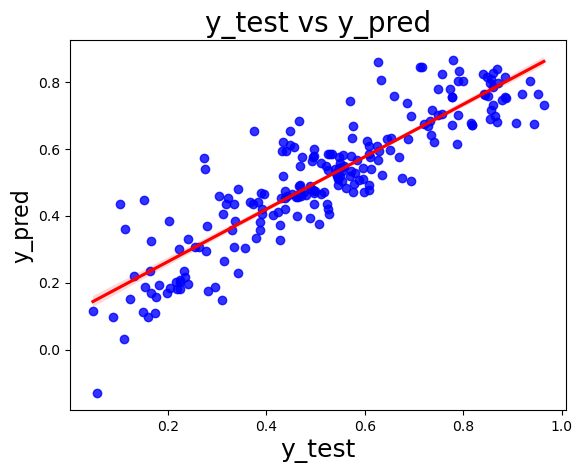

In [580]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.7853
    - Train dataset Adjusted R^2 : 0.829   
    - Test dataset Adjusted R^2  : 0.7751

#### Demand of bikes depend on year, holiday, working day, temp, windspeed, sat, sun, Light_snowrain, spring and winter.